<h1><b><center> Keras implementation for reference<center><b><h1>

This notebook is created with the sole purpose to compare our neural network model implemented from scratch with the actual Keras implementation

### Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Getting the input data

In [2]:
x = np.arange(0, 100)
y = np.square(x)

x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

### Normalizing the data

In [3]:
x_scale = MinMaxScaler()
x = x_scale.fit_transform(x)
y_scale = MinMaxScaler()
y = y_scale.fit_transform(y)

### Implementing our keras model

In [4]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='glorot_uniform'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
model.compile(loss='mse', optimizer='sgd')
model.fit(x, y, epochs=10000, verbose=0)

### Prediction and loss calculation

In [6]:
y_pred = model.predict(x)
print('MSE: %.6f' % mean_squared_error(y, y_pred))

MSE: 0.000124


### Plotting results

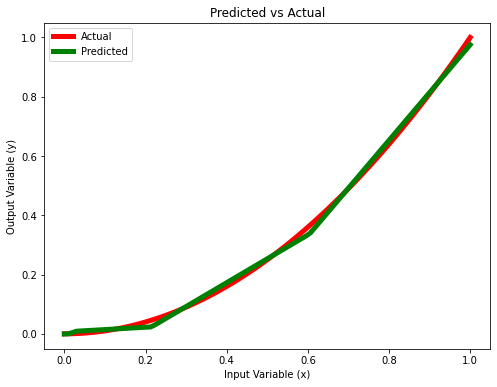

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'r', label='Actual', linewidth=5)
plt.plot(x, y_pred, 'g', label='Predicted', linewidth=5)
plt.title('Predicted vs Actual')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()